## UNDERSTANDING THE HYPOTHESIS TESTING WITHOUT KNOWING THE POPULATION STD

### What is a Hypothesis?

A hypothesis is an educated guess about something in the world around you. It should be testable, either by experiment or observation. For example:

-A new medicine you think might work.

-A way of teaching you think might be better.

-A possible location of new species.

-A fairer way to administer standardized tests.

It can really be anything at all as long as you can put it to the test.

### What is Hypothesis Testing?

Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. 


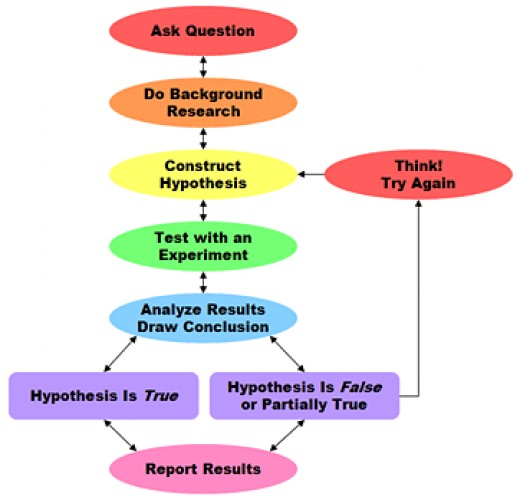

#### Hypothesis Testing starts with the formulation of these two hypotheses:

A) Null hypothesis (H₀): The status quo

B) Alternate hypothesis (H₁): The challenge to the status quo (The BOLD claim)


### The t score formula enables you to take an individual score and transform it into a standardized form>one which helps you to compare scores.

We will use t score formula when we don’t know the population standard deviation and we have a small sample (under 30).


$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

#### When to use a T-distribution?

The most important use of the t-distribution is that you can approximate the value of the standard deviation of
the population ( ) from the sample standard deviation (s). However, as the sample size increases more than
30, the t-value tends to be equal to the z-value.
The following flowchart summarises the decision making process.


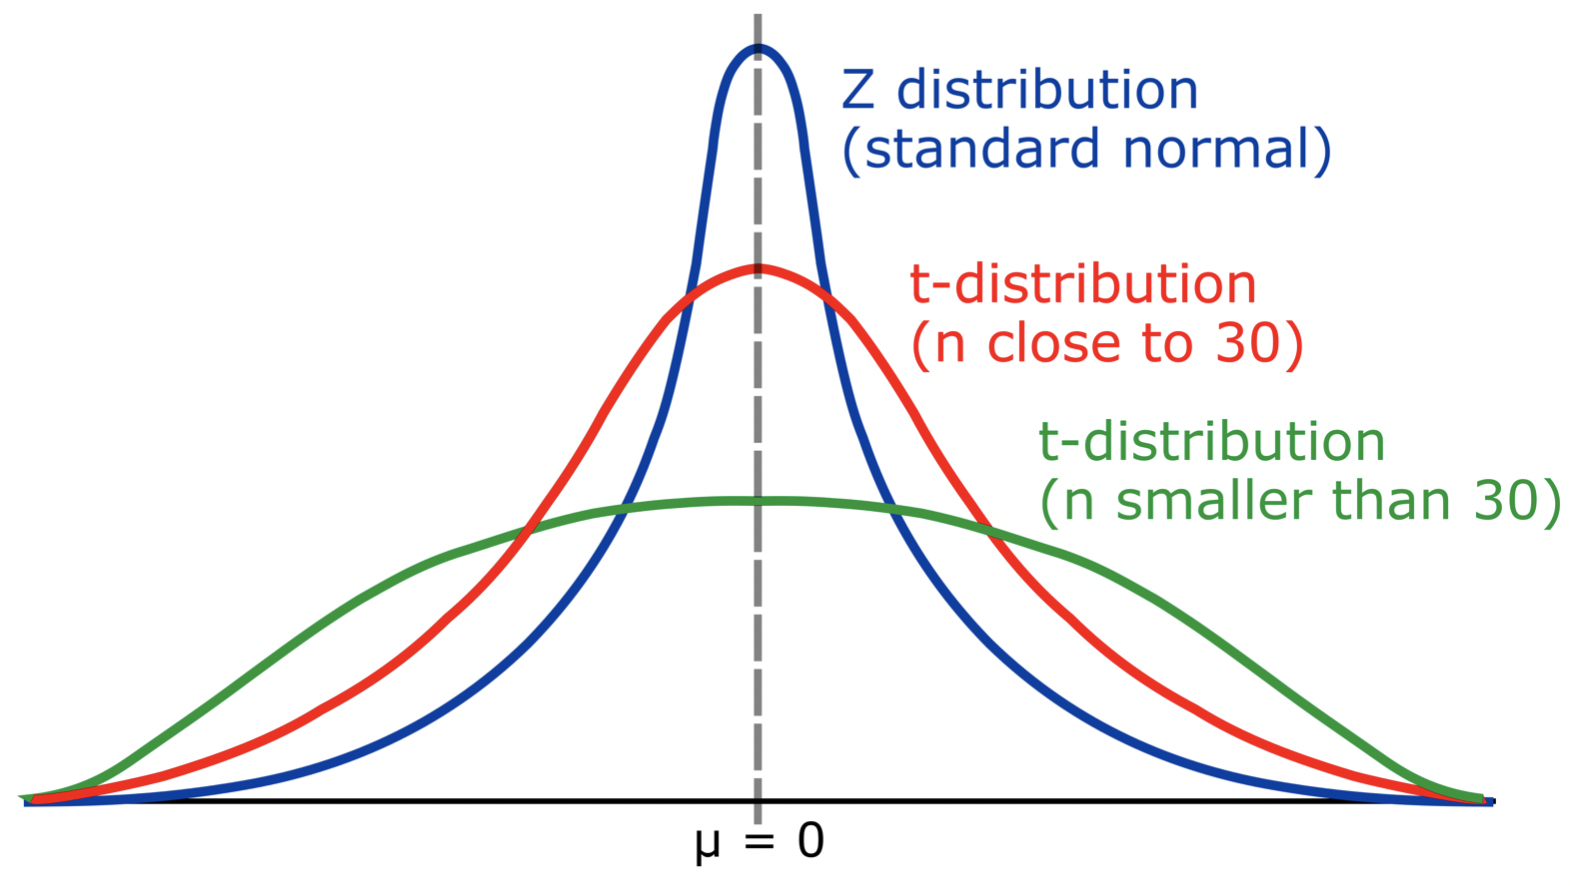

## Now we will understand hypothesis testing using t_score formula by solving problems:--

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

### Understanding the Hypothesis Testing:-

#### Step - 1:

Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ > \ < \ \neq  $


Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

#### Step - 2:

Collect a sample of size n

Compute the mean from this sample $ \bar{x} $

#### Step - 3: Compute Test Statistic:

If population variance is known$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

If population variance is unknown$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

#### Step - 4: 
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

#### Step - 5.1: Apply decision rule:

If test statistic is z-score -


Two tailed z-test:  $$ |z|>z_{\frac{\alpha}{2}} \Rightarrow \text { Accept } H_{1} \text { or Re ject } H_{0} $$

Right tailed z-test:$$z>z_{\alpha}  \Rightarrow \text {Accept } H_{1} \text { or \ Reject }  H_{0} $$



Left tailed z-test:$$ z<-z_{\alpha} \Rightarrow \text { Accept } H_{1} \text { or Re ject } H_{0} $$

If test statistic is t-score

Two tailed t-test:$$ |t|>t_{n-1, \frac{\alpha}{2}} \Rightarrow \text { Accept } H_{1} \text { or Re ject } H_{0}  $$

Right tailed t-test:$$ t>t_{n-1, \alpha} \Rightarrow \text { Accept } H_{1} \text { or Re ject } H_{0} $$

Left tailed t-test:$$ t<t_{n-1, \alpha} \Rightarrow \text { Accept } H_{1} \text { or Reject } H_{0} $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$

For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$

Now, $$ \text { if }(p \text { value }<\alpha) \Rightarrow \text { Accept } H_{1} \text { or Re ject } H_{0}
$$ 

In [2]:
# z_score for sampling distributions
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

## Unknown Variance of Population

### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~

In this numerical, we do not have population standard deviation so we cannot use z-test.

T-test is used for that we find the sample  standard deviation.

Step - 1:
Alternate Hypothesis (Bold claim): 
$$  H_1=500  $$
Null Hypothesis (Status Quo):
$$ H_0 \neq 500 $$

Step - 2:

Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
Compute sample mean$$ \bar{x} \ = 465.3 ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: ? tailed z-test:$$ fail \ to \ reject \ H_0   $$

Step - 5.2: Compute p-value

In [3]:
sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sample_mean= sum(sample)/len(sample)

print('SAMPLE MEAN= ',sample_mean)

SAMPLE MEAN=  465.3


In [4]:
sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

avg= round(sum(sample)/len(sample),0)

var = sum((x- avg)**2 for x in sample) / (len(sample)-1 )
print("variance is:- ",var)

sd= var**0.5

print("Standard deviation is:- ",sd)

variance is:-  7542.777777777777
Standard deviation is:-  86.84916682258833


In [5]:
# Two Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


In [6]:
# Two Tail - Calculating the t-critical value
import scipy.stats
t_critical= scipy.stats.t.ppf(q=1-.05/2,df=9)
t_critical

2.2621571627409915

In [7]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 86.84916682258833

In [8]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-1.2634667530201698


In [9]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [10]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20642148760541668
Fail to reject Null Hypothesis


Text(465.3, 0.0007, 'x_bar')

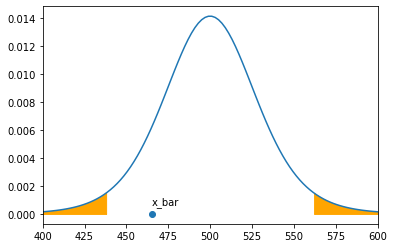

In [11]:
from scipy.stats import t

x_min = 400
x_max = 600
df=sample_size-1

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df, mean, std)
plt.fill_between(x1, y1, color='orange')



x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


### So,to conclude Q-1, we failed to gather enough evidence to reject the null hypothesis.


### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1 > 4 \  $$Null Hypothesis (Status Quo):$$ H_0 \leq  4 $$

Step - 2:

Collect a sample of size n = 20$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
Compute sample mean$$ \bar{x} \ = 4.25 \  $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $

Step - 5.1:  tailed z-test:$$ fail \ to \ reject \ H_0 \  $$

Step - 5.2: Compute p-value

In [12]:
sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

sample_mean= sum(sample)/len(sample)

print('SAMPLE MEAN= ',sample_mean)

SAMPLE MEAN=  4.25


In [13]:
# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [14]:
# One Tail - Calculating the t-critical value
import scipy.stats
t_critical= scipy.stats.t.ppf(q=1-.05,df=19)
t_critical

1.729132811521367

In [15]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.8885

In [16]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.2583387605513732


In [17]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [18]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.10413463449109317
Fail to reject Null Hypothesis


Text(4.25, 0.0007, 'x_bar')

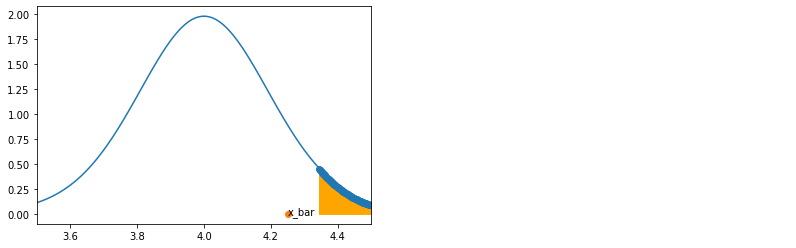

In [19]:
from scipy.stats import t

x_min = 3.5
x_max = 4.5
df=sample_size-1

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)

t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


plt.annotate("Rejection Region",(5.5,0.05))
plt.scatter(x2,y2)

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))




### So, to conclude Q-2, we failed to gather enough evidence to reject the null hypothesis.


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~


Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1 = 15 \  $$Null Hypothesis (Status Quo):$$ H_0 \neq  15 $$

Step - 2:

Collect a sample of size n = 20$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
Compute sample mean$$ \bar{x} \ = 15.1 \  $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $

Step - 5.1:  tailed z-test:$$ fail \ to \ reject \ H_0 \  $$

Step - 5.2: Compute p-value

In [20]:
sample= [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sample_mean= sum(sample)/len(sample)

print('SAMPLE MEAN= ',sample_mean)

SAMPLE MEAN=  15.098999999999998


In [21]:
# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [22]:
# Two Tail - Calculating the t-critical value
import scipy.stats
t_critical= scipy.stats.t.ppf(q=1-.05,df=19)
t_critical

1.729132811521367

In [23]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 1.03

In [24]:
# Calculating the z-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.43418795679607414


In [25]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [26]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33207597889538376
Fail to reject Null Hypothesis


Text(15.1, 0.0007, 'x_bar')

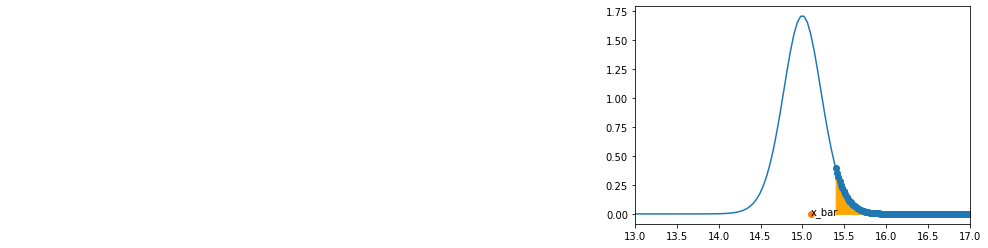

In [27]:
from scipy.stats import t

x_min = 13
x_max = 17
df=sample_size-1

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)

t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')


plt.annotate("Rejection Region",(5.5,0.05))
plt.scatter(x2,y2)

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))



### So, to conclude Q-3, we failed to gather enough evidence to reject the null hypothesis.


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1 < 100 \  $$Null Hypothesis (Status Quo):$$ H_0 \geq  100 $$

Step - 2:

Collect a sample of size n = 100

Compute sample mean$$ \bar{x} \ = 97.5 \  $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $

Step - 5.1:  tailed z-test:$$ \ Accept \ H_0 \  $$

Step - 5.2: Compute p-value

In [28]:
# One Taill - Calculating the z-critical value

alpha = 1 - 0.99

z_critical = norm.ppf(1 - alpha)

print(z_critical)

2.3263478740408408


In [29]:
# Two Tail - Calculating the t-critical value
import scipy.stats
t_critical= scipy.stats.t.ppf(q=1-.05,df=99)
t_critical

1.6603911559963895

In [30]:
# Defining the sample and population parameters

sample_size = 100
sample_mean = 97.4
pop_mean = 100
sample_std = 7

In [31]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.7142857142857064


In [32]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [33]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00010188922978071613
Reject Null Hypothesis


Text(97.4, 0.0007, 'x_bar')

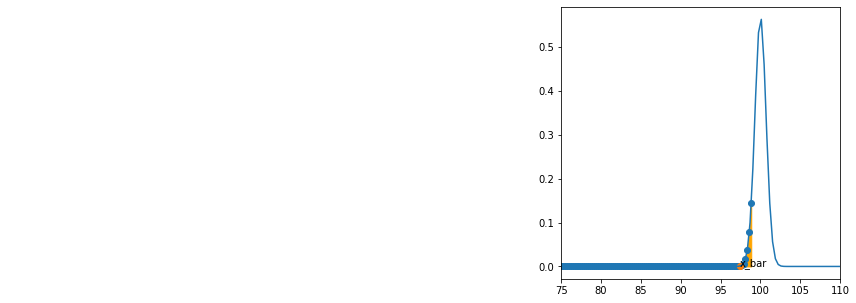

In [34]:
from scipy.stats import t

x_min = 75
x_max = 110
df=sample_size-1

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df, mean, std)
plt.figure(figsize = (5,5))
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df, mean, std)
plt.fill_between(x1, y1, color='orange')



plt.annotate("Rejection Region",(5.5,0.05))
plt.scatter(x1,y1)


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


### So, to conclude  Q-4, we reject the null hypothesis statement so that he mean prediction time ofapplication is greater than 100.

### -------------------------------------------------------------------THANK YOU-------------------------------------------------------------------------